In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('drug200.csv')

Saving drug200.csv to drug200.csv


In [23]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [19]:
df1=np.array(df)
df1[0:4]

array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'drugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       [28, 'F', 'NORMAL', 'HIGH', 7.798, 'drugX']], dtype=object)

In [20]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [24]:
 from sklearn.preprocessing import OrdinalEncoder

In [25]:
oe=OrdinalEncoder()

In [29]:
df['Drug']=oe.fit_transform(df[['Drug']])
df['Sex']=oe.fit_transform(df[['Sex']])
df['BP']=oe.fit_transform(df[['BP']])
df['Cholesterol']=oe.fit_transform(df[['Cholesterol']])


In [30]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [36]:
#create a dictionary to choose the suitable parameters for our data
#pre-prunning
parameters={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':[1,2,3,4,5,6,7,8],
            'max_features':['auto','sqrt','log2']
            }

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
dtc=DecisionTreeClassifier()

In [40]:
cv=GridSearchCV(dtc,param_grid=parameters, cv=5,scoring='accuracy')

In [41]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [43]:
y_pred=cv.predict(x_test)

In [45]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7878787878787878

In [53]:
dtc2=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best')
dtc2.fit(x_train,y_train)
ypred2=dtc2.predict(x_test)
print(accuracy_score(ypred2,y_test)*100)

100.0


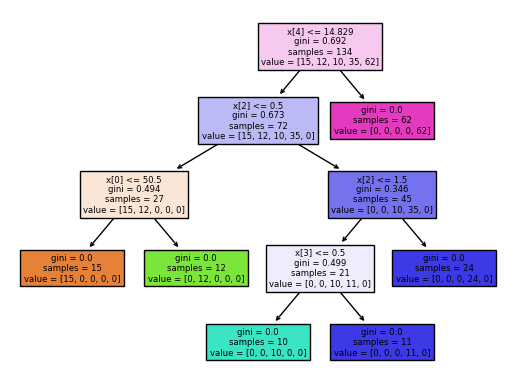

In [55]:
from sklearn import tree
tree.plot_tree(dtc2,filled=True)
plt.show()